In [ ]:
!pip install --upgrade numpy==1.24.3

In [ ]:
import numpy as np
NP_FLOAT_TYPES = {np.float16, np.float32, np.float64}

In [ ]:
!pip install imgaug

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 15.4 MB/s eta 0:00:00


Trying only Aug

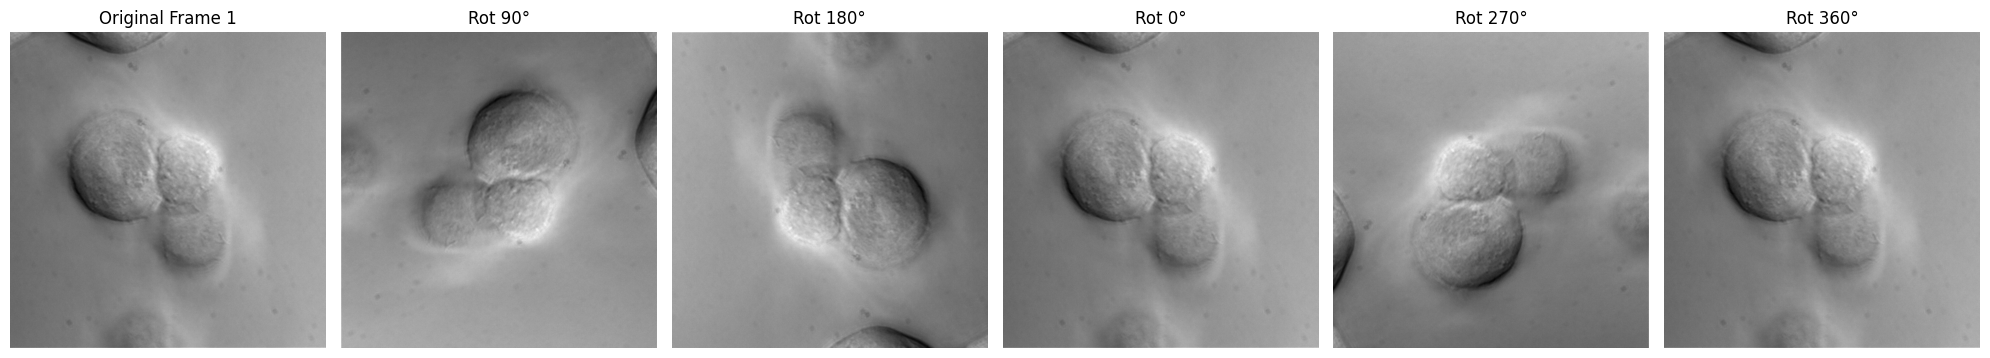

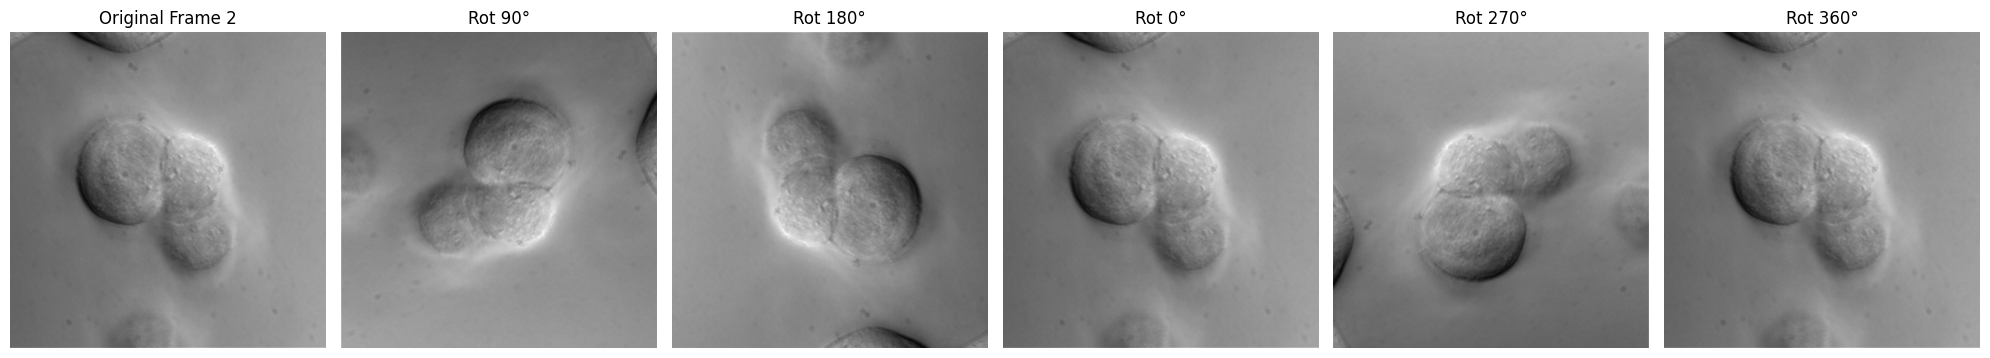

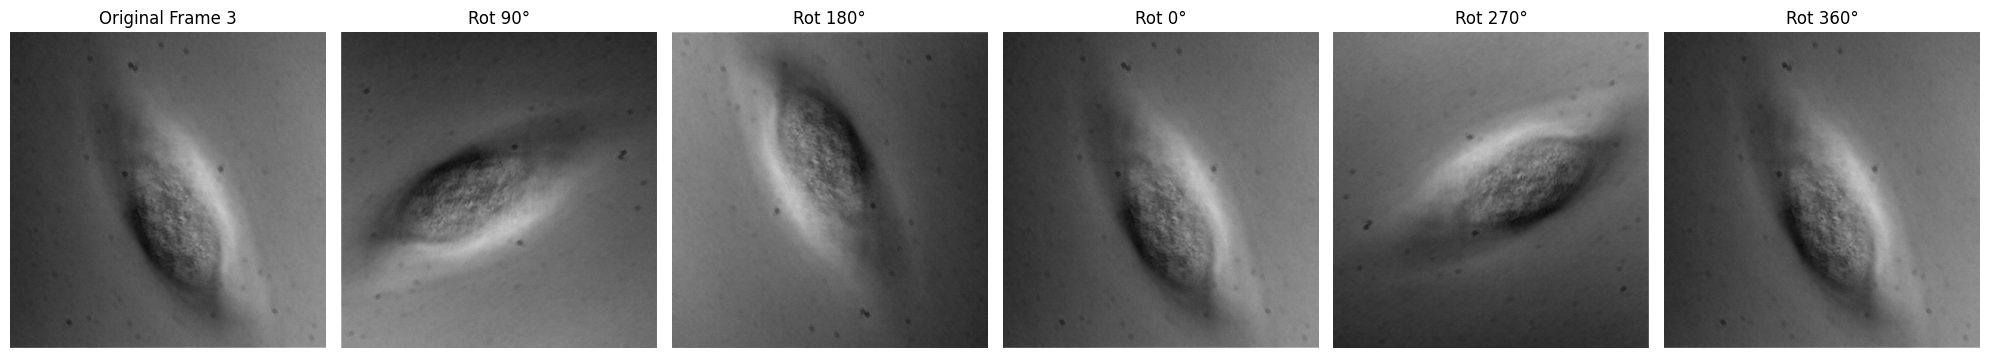

In [ ]:
import numpy as np
from PIL import Image
import imgaug.augmenters as iaa
import matplotlib.pyplot as plt

# Step 1: Load original tif frames
img_paths = [
    "/content/drive/MyDrive/Streams/Cell1_S1.tif",
    "/content/drive/MyDrive/Streams/Cell1_S1001.tif",
    "/content/drive/MyDrive/Streams/Cell2_S1011.tif"
]

original_images = [np.array(Image.open(path)) for path in img_paths]
original_shape = original_images[0].shape[:2]  # (H, W)

# Step 2: Function for center cropping
def center_crop(image, target_shape):
    h, w = image.shape[:2]
    target_h, target_w = target_shape
    start_y = (h - target_h) // 2
    start_x = (w - target_w) // 2
    return image[start_y:start_y + target_h, start_x:start_x + target_w]

# Step 3: Define rotation angles
rotation_angles = [90, 180, 0, 270, 360]

# Step 4: Process each image and store augmented versions
all_augmented_sets = []  # Will hold [[img1_rot1, img1_rot2, ...], [img2_rot1, ...], ...]

for img in original_images:
    augmented_versions = []
    for angle in rotation_angles:
        augmenter = iaa.Sequential([iaa.Affine(rotate=angle)])
        aug = augmenter(image=img)
        aug_cropped = center_crop(aug, original_shape)
        augmented_versions.append(aug_cropped)
    all_augmented_sets.append(augmented_versions)

# Step 5: Plot original + augmented frames side-by-side
for i, (original, aug_set) in enumerate(zip(original_images, all_augmented_sets)):
    fig, axs = plt.subplots(1, 6, figsize=(20, 4))
    axs[0].imshow(original, cmap='gray')
    axs[0].set_title(f"Original Frame {i+1}")
    axs[0].axis('off')

    for j, aug in enumerate(aug_set):
        axs[j + 1].imshow(aug, cmap='gray')
        axs[j + 1].set_title(f"Rot {rotation_angles[j]}°")
        axs[j + 1].axis('off')

    plt.tight_layout()
    plt.show()


In [ ]:
!pip install filterpy==1.4.5
# !pip install scikit-image==0.19.3
!pip install --no-cache-dir sort-tracker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110460 sha256=cd9188f7d91f14d5b1bf5e6034d29e9c5cd7e164b837a36f33b334b679256fc4
  Stored in directory: /root/.cache/pip/wheels/12/dc/3c/e12983eac132d00f82a20c6cbe7b42ce6e96190ef8fa2d15e1
Successfully built filterpy
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for sort-tracker (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for sort-tracker
Failed to build sort-tracker
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (sort-tracker)


In [ ]:
!pip install trackpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for trackpy: filename=trackpy-0.6.4-py3-none-any.whl size=130035 sha256=d3db27706a493ee97a7f22f1608270ec2cfb5b76e0788ac889ba6caf3b227900
  Stored in directory: /root/.cache/pip/wheels/1e/e0/b0/fb454bc84bb6f56fb1017f941718c4a12753515e3350e8179b
Successfully built trackpy


In [ ]:
!pip install norfair

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.5/237.5 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: rich
    Found existing installation: rich 13.9.4
    Uninstalling rich-13.9.4:
      Successfully uninstalled rich-13.9.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
pymc 5.21.2 requires rich>=13.7.1, but you have rich 12.6.0 which is incompatible.


In [ ]:
import numpy as np
from PIL import Image
from skimage.feature import blob_log
import cv2
import matplotlib.pyplot as plt
from norfair import Detection, Tracker, draw_tracked_objects
from norfair import Video, draw_points

# Step 1: Detect particles using blob_log
def detect_particles(frame):
    blobs = blob_log(frame, min_sigma=1, max_sigma=5, num_sigma=10, threshold=0.02)
    detections = []
    for y, x, r in blobs:
        detections.append(Detection(points=np.array([[x, y]])))  # Norfair uses (x, y)
    return detections

# Step 2: Load frames (assume `all_frames` is already defined as in your previous script)

# Step 3: Initialize Norfair tracker
tracker = Tracker(distance_function="euclidean", distance_threshold=15)

# Step 4: Track and plot
for frame_idx, frame in enumerate(all_frames):
    detections = detect_particles(frame)
    tracked_objects = tracker.update(detections)

    # Prepare RGB frame for drawing
    frame_rgb = cv2.cvtColor(frame.astype(np.uint8), cv2.COLOR_GRAY2RGB)

    # Draw tracked particles with IDs
    draw_tracked_objects(frame_rgb, tracked_objects)

    # Plot using matplotlib
    plt.figure(figsize=(6, 6))
    plt.imshow(frame_rgb)
    plt.title(f"Frame {frame_idx + 1} – Tracked Particles")
    plt.axis("off")
    plt.show()


NameError: name 'all_frames' is not defined

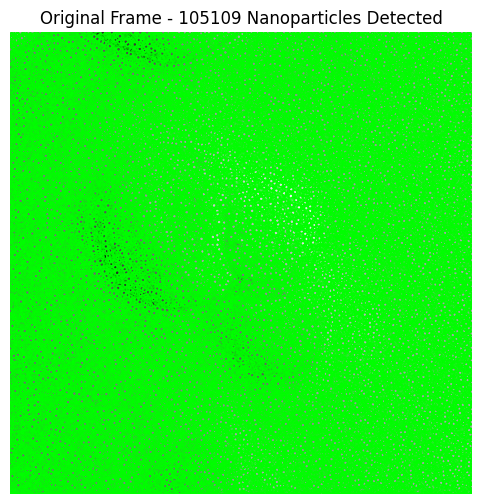

In [ ]:
from skimage.feature import blob_log
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load your sample image (for standalone use)
# If you're using original_images or all_frames, replace this accordingly
frame = np.array(Image.open("/content/drive/MyDrive/Streams/Cell1_S1.tif"))

def detect_and_plot_nano_particles(frame, title="Nanoparticle Detection"):
    # Preprocessing: Normalize image
    frame = frame.astype(np.float32)
    frame = (frame - np.min(frame)) / (np.max(frame) - np.min(frame))

    # Adjusted blob detection params
    blobs = blob_log(
        frame,
        min_sigma=0.5,      # detect smaller blobs
        max_sigma=3,        # up to medium blobs
        num_sigma=15,
        threshold=0.005     # more sensitive
    )

    # Plotting
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(frame, cmap='gray')
    for y, x, r in blobs:
        c = plt.Circle((x, y), r * 1.5, color='lime', linewidth=1, fill=False)
        ax.add_patch(c)

    ax.set_title(f"{title} - {len(blobs)} Nanoparticles Detected")
    ax.axis('off')
    plt.show()

    return blobs

# Run detection
blobs = detect_and_plot_nano_particles(frame, title="Original Frame")


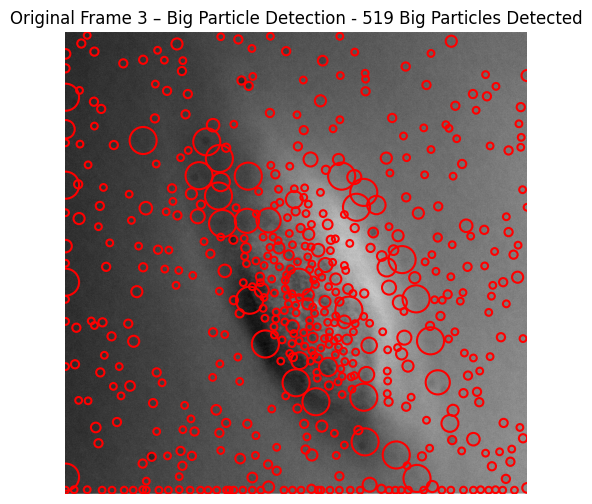

[array([444.      , 682.      ,   7.142857], dtype=float32),
 array([107.       , 390.       ,   6.0714283], dtype=float32),
 array([691., 443.,  20.], dtype=float32),
 array([594., 408.,  20.], dtype=float32),
 array([460.       , 372.       ,   6.0714283], dtype=float32),
 array([904.       , 857.       ,   6.0714283], dtype=float32),
 array([597.      , 575.      ,   8.214286], dtype=float32),
 array([941.       , 191.       ,   6.0714283], dtype=float32),
 array([707., 616.,   5.], dtype=float32),
 array([516.      , 576.      ,  10.357142], dtype=float32),
 array([609., 548.,   5.], dtype=float32),
 array([119.       , 406.       ,   6.0714283], dtype=float32),
 array([677.      , 548.      ,   7.142857], dtype=float32),
 array([639., 541.,   5.], dtype=float32),
 array([668., 506.,   5.], dtype=float32),
 array([742.      , 582.      ,  13.571428], dtype=float32),
 array([494.      , 495.      ,   7.142857], dtype=float32),
 array([694.      , 673.      ,  11.428572], dtype=float

In [ ]:
from skimage.feature import blob_log
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def detect_big_dark_blobs(image, title="Big Particle Detection"):
    # Convert to grayscale float and normalize
    img = image.astype(np.float32)
    img = (img - img.min()) / (img.max() - img.min())

    # Invert if particles are dark
    img_inverted = 1.0 - img

    # Detect large dark blobs
    blobs = blob_log(
        img_inverted,
        min_sigma=5,        # start with larger blobs
        max_sigma=20,       # allow bigger particles
        num_sigma=15,
        threshold=0.01      # sensitive to stronger blobs
    )

    # Filter by size (you can adjust r threshold)
    blobs_filtered = [b for b in blobs if b[2] > 2.5]  # only bigger blobs

    # Plot
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(image, cmap='gray')
    for y, x, r in blobs_filtered:
        ax.add_patch(plt.Circle((x, y), r * 1.5, color='red', fill=False, linewidth=1.5))
    ax.set_title(f"{title} - {len(blobs_filtered)} Big Particles Detected")
    ax.axis('off')
    plt.show()

    return blobs_filtered

# ✅ Example usage with one image
image = np.array(Image.open("/content/drive/MyDrive/Streams/Cell2_S1011.tif"))
detect_big_dark_blobs(image, title="Original Frame 3 – Big Particle Detection")


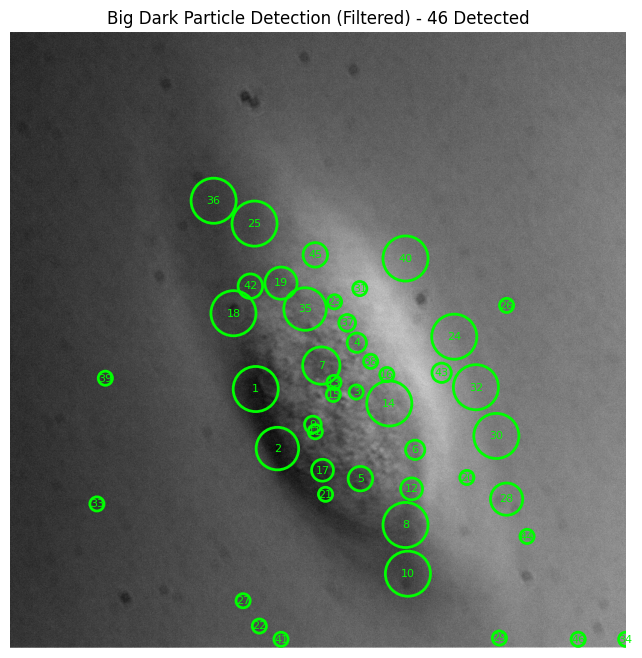

In [ ]:
def detect_filtered_big_dark_blobs(image, title="Filtered Big Particle Detection"):
    # Normalize and invert
    img = image.astype(np.float32)
    img = (img - img.min()) / (img.max() - img.min())
    img_inverted = 1.0 - img

    # Detect large blobs
    blobs = blob_log(
        img_inverted,
        min_sigma=5,
        max_sigma=25,
        num_sigma=15,
        threshold=0.02  # higher to ignore small weak spots
    )

    # Filter blobs by size (radius)
    blobs_filtered = [b for b in blobs if b[2] > 6.5]  # ~radius > 6.5 pixels

    # Plot
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(image, cmap='gray')
    for i, (y, x, r) in enumerate(blobs_filtered):
        ax.add_patch(plt.Circle((x, y), r * 1.5, color='lime', fill=False, linewidth=2))
        ax.text(x, y, str(i+1), color='lime', fontsize=8, ha='center', va='center')
    ax.set_title(f"{title} - {len(blobs_filtered)} Detected")
    ax.axis('off')
    return fig

# Run improved detection
fig_filtered = detect_filtered_big_dark_blobs(image, title="Big Dark Particle Detection (Filtered)")


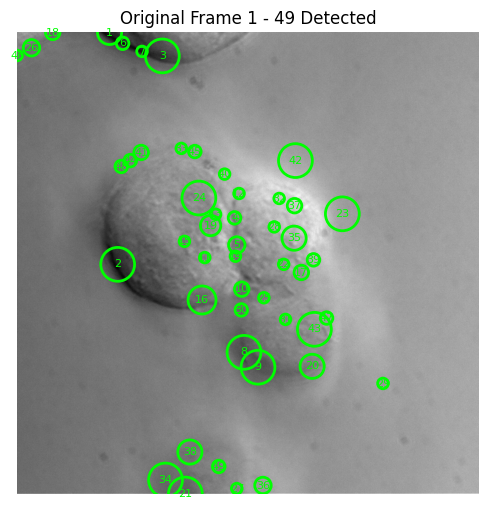

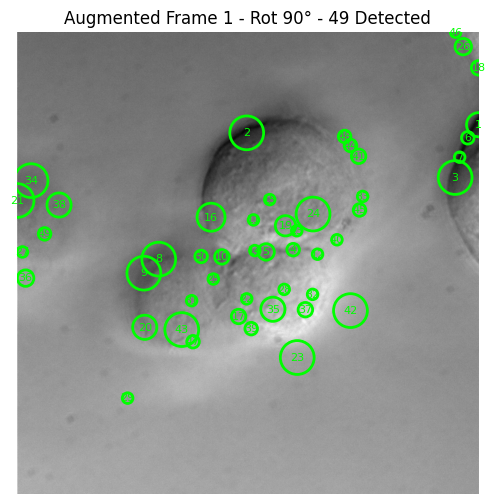

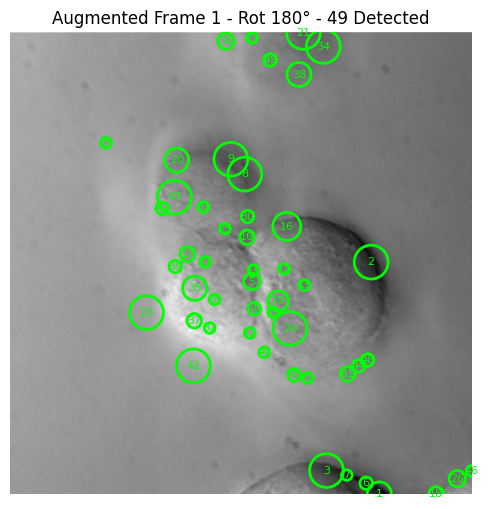

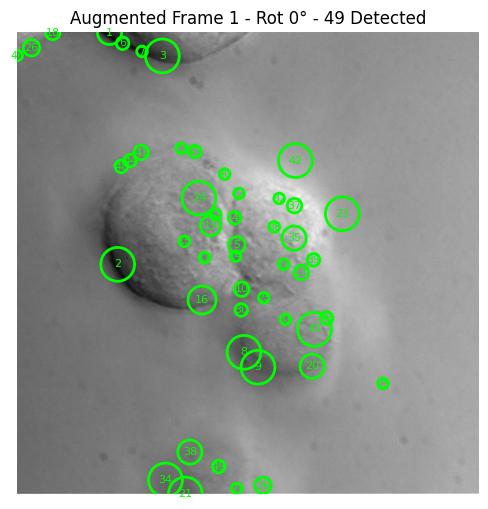

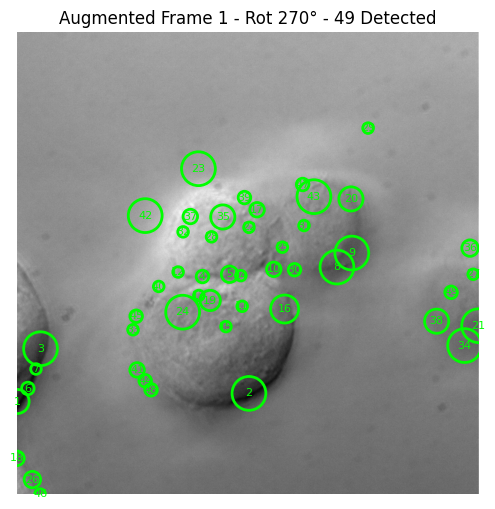

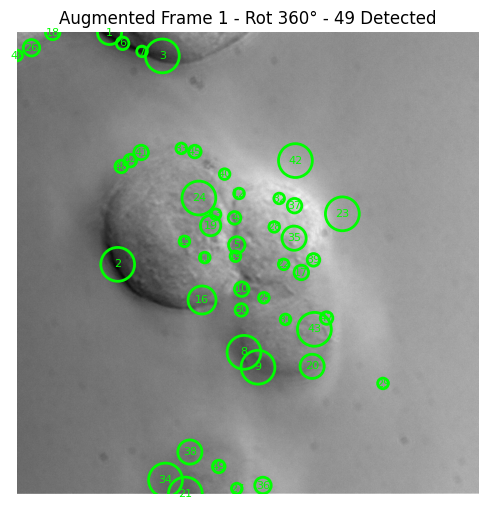

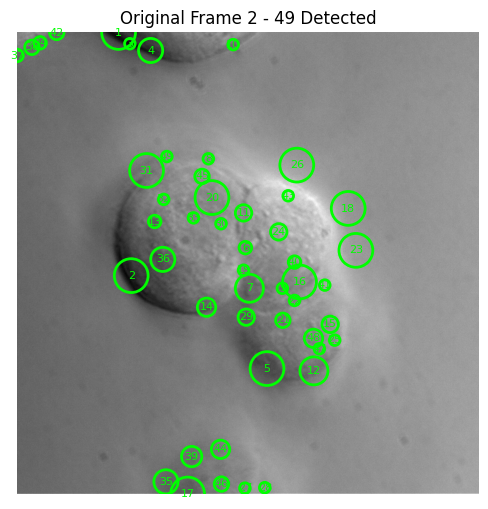

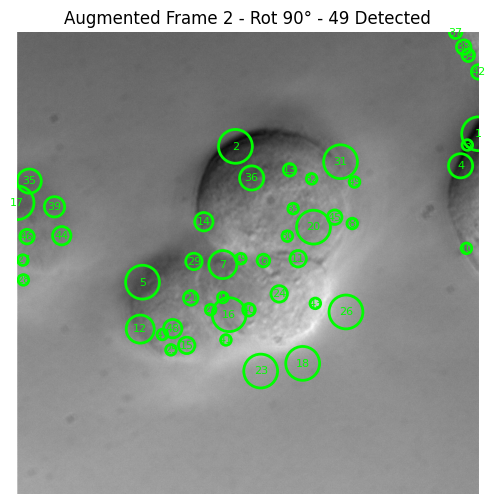

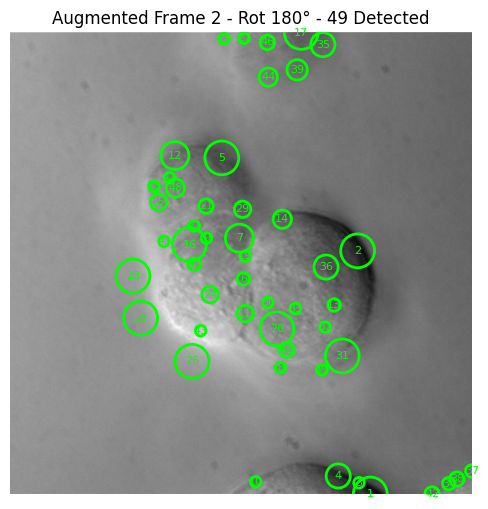

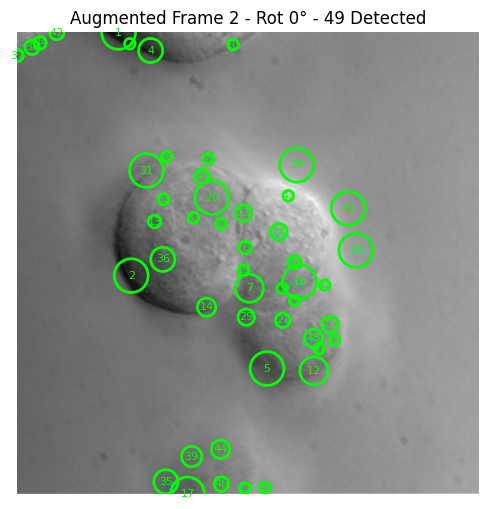

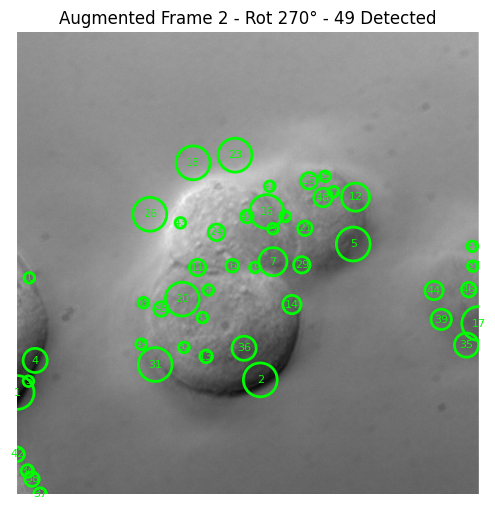

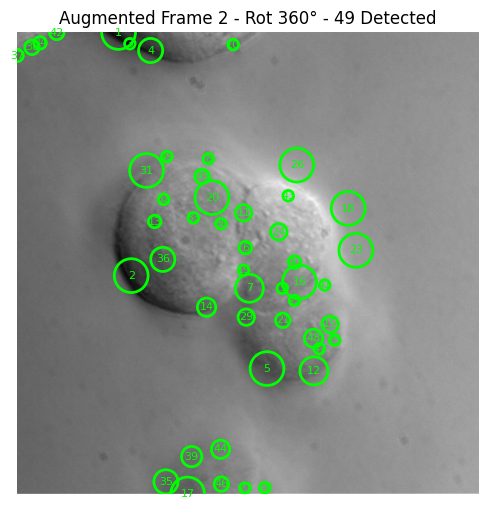

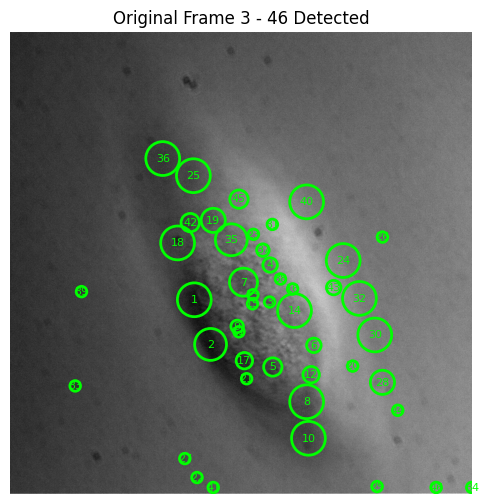

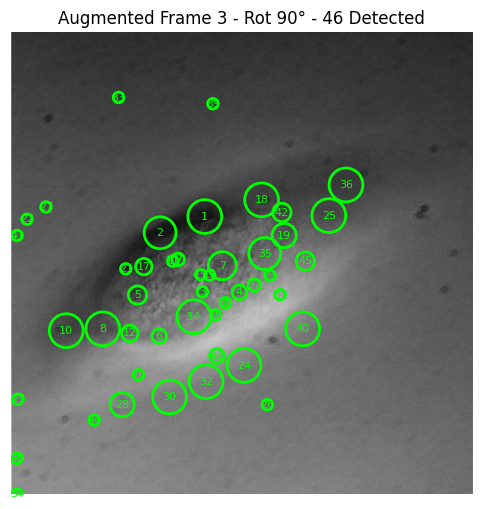

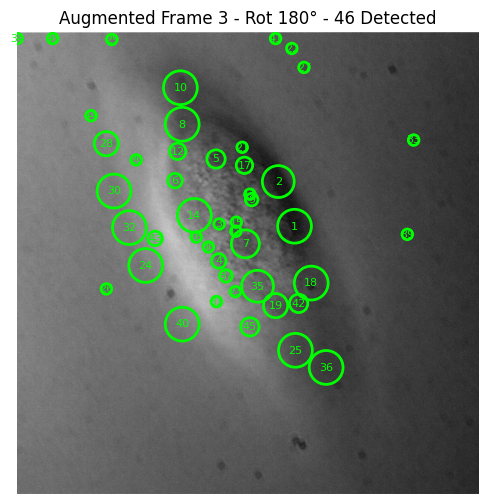

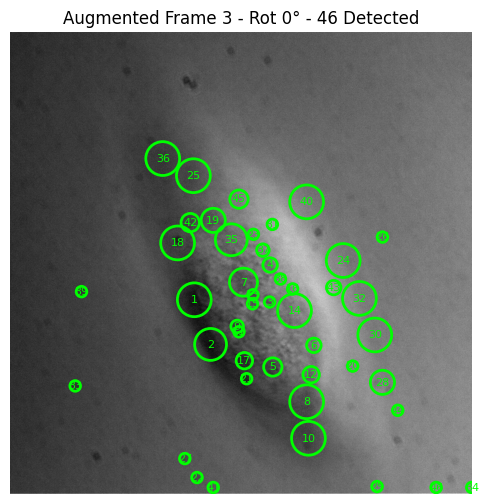

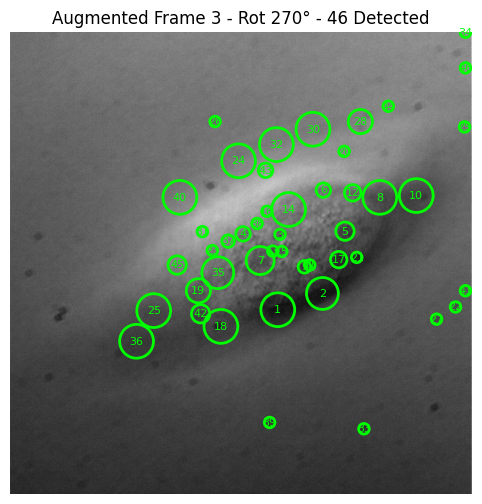

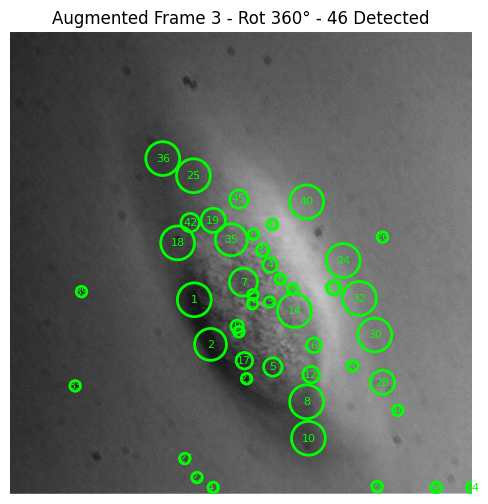

In [ ]:
import numpy as np
from PIL import Image
import imgaug.augmenters as iaa
import matplotlib.pyplot as plt
from skimage.feature import blob_log

# Step 1: Load original tif frames
img_paths = [
    "/content/drive/MyDrive/Streams/Cell1_S1.tif",
    "/content/drive/MyDrive/Streams/Cell1_S1001.tif",
    "/content/drive/MyDrive/Streams/Cell2_S1011.tif"
]

original_images = [np.array(Image.open(path)) for path in img_paths]
original_shape = original_images[0].shape[:2]

# Step 2: Center crop after rotation
def center_crop(image, target_shape):
    h, w = image.shape[:2]
    target_h, target_w = target_shape
    start_y = (h - target_h) // 2
    start_x = (w - target_w) // 2
    return image[start_y:start_y + target_h, start_x:start_x + target_w]

# Step 3: Define rotation angles
rotation_angles = [90, 180, 0, 270, 360]

# Step 4: Augment images
all_augmented_sets = []
for img in original_images:
    augmented_versions = []
    for angle in rotation_angles:
        augmenter = iaa.Sequential([iaa.Affine(rotate=angle)])
        aug = augmenter(image=img)
        aug_cropped = center_crop(aug, original_shape)
        augmented_versions.append(aug_cropped)
    all_augmented_sets.append(augmented_versions)

# Step 5: Detection Function for Big Dark Blobs
def detect_filtered_big_dark_blobs(image, title="Filtered Big Particle Detection"):
    img = image.astype(np.float32)
    img = (img - img.min()) / (img.max() - img.min())
    img_inverted = 1.0 - img

    blobs = blob_log(
        img_inverted,
        min_sigma=5,
        max_sigma=25,
        num_sigma=15,
        threshold=0.02
    )

    blobs_filtered = [b for b in blobs if b[2] > 6.5]

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(image, cmap='gray')
    for i, (y, x, r) in enumerate(blobs_filtered):
        ax.add_patch(plt.Circle((x, y), r * 1.5, color='lime', fill=False, linewidth=2))
        ax.text(x, y, str(i+1), color='lime', fontsize=8, ha='center', va='center')
    ax.set_title(f"{title} - {len(blobs_filtered)} Detected")
    ax.axis('off')
    plt.show()

# Step 6: Run detection on original + augmented frames
for i, (original, aug_set) in enumerate(zip(original_images, all_augmented_sets)):
    detect_filtered_big_dark_blobs(original, title=f"Original Frame {i+1}")

    for j, aug in enumerate(aug_set):
        detect_filtered_big_dark_blobs(aug, title=f"Augmented Frame {i+1} - Rot {rotation_angles[j]}°")


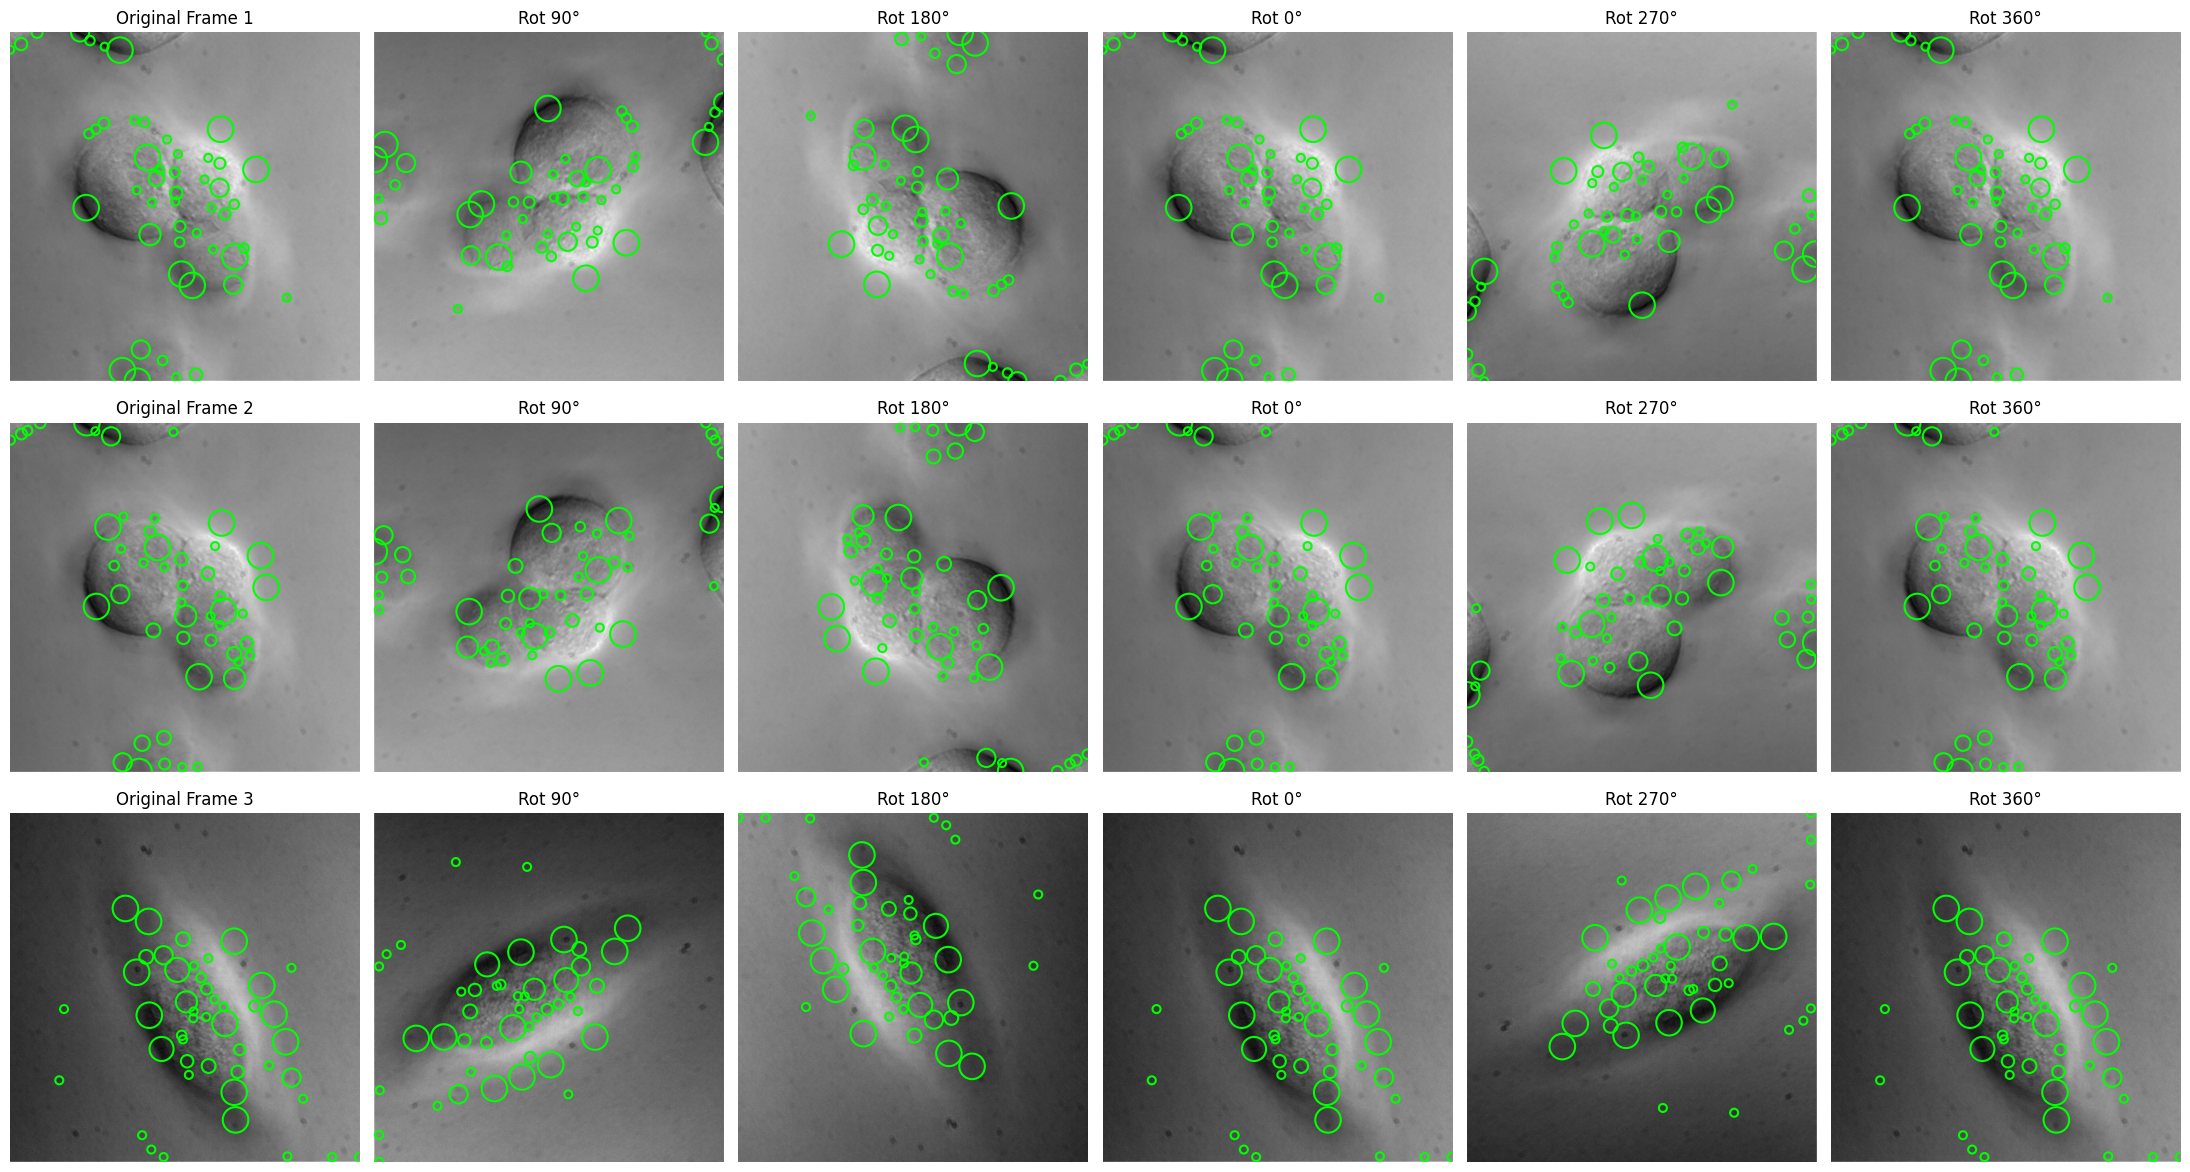

In [ ]:
import matplotlib.pyplot as plt
from skimage.feature import blob_log

# --- Helper: Apply detection + overlay circles ---
def detect_blobs_for_plot(frame):
    img = frame.astype(np.float32)
    img = (img - img.min()) / (img.max() - img.min())
    img_inverted = 1.0 - img

    blobs = blob_log(img_inverted, min_sigma=5, max_sigma=25, num_sigma=15, threshold=0.02)
    blobs_filtered = [b for b in blobs if b[2] > 6.5]
    return blobs_filtered

# --- Build grid: 3 rows (one per original), 6 cols (1 original + 5 rotated) ---
fig, axs = plt.subplots(len(original_images), len(rotation_angles)+1, figsize=(22, 12))

for i, (original, aug_set) in enumerate(zip(original_images, all_augmented_sets)):
    frames_row = [original] + aug_set
    labels_row = [f"Original Frame {i+1}"] + [f"Rot {angle}°" for angle in rotation_angles]

    for j, (frame, label) in enumerate(zip(frames_row, labels_row)):
        ax = axs[i, j]
        ax.imshow(frame, cmap='gray')

        # Detect and draw
        blobs = detect_blobs_for_plot(frame)
        for y, x, r in blobs:
            ax.add_patch(plt.Circle((x, y), r * 1.5, color='lime', fill=False, linewidth=1.5))

        ax.set_title(label)
        ax.axis('off')

plt.tight_layout()
plt.show()
